In [13]:
import pandas as pd

# Load directly from root
data = pd.read_excel('Online Retail.xlsx')
print(data.head())



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [14]:
# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Remove canceled orders (Quantity <= 0)
data = data[data['Quantity'] > 0]

# Aggregate data per customer
customer_data = data.groupby('CustomerID').agg({
    'Quantity':'sum',
    'UnitPrice':'mean',  # average unit price per customer
    'InvoiceNo':'nunique'  # number of purchases
}).reset_index()

# Rename columns for clarity
customer_data.rename(columns={'InvoiceNo':'NumPurchases', 'UnitPrice':'AvgUnitPrice'}, inplace=True)

print(customer_data.head())


   CustomerID  Quantity  AvgUnitPrice  NumPurchases
0     12346.0     74215      1.040000             1
1     12347.0      2458      2.644011             7
2     12348.0      2341      5.764839             4
3     12349.0       631      8.289041             1
4     12350.0       197      3.841176             1


In [15]:
from sklearn.preprocessing import StandardScaler

features = ['Quantity','AvgUnitPrice','NumPurchases']
X = customer_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Hierarchical
hier = AgglomerativeClustering(n_clusters=5, linkage='ward')
customer_data['HierCluster'] = hier.fit_predict(X_scaled)

# DBSCAN (tune eps if needed)
db = DBSCAN(eps=1.5, min_samples=5)
customer_data['DBSCANCluster'] = db.fit_predict(X_scaled)


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

customer_data['PCA1'] = X_pca[:,0]
customer_data['PCA2'] = X_pca[:,1]


In [18]:
import joblib

# Save clustering models
joblib.dump(kmeans, 'CustomerSeg_KMeans_Model.pkl')
joblib.dump(hier, 'CustomerSeg_Hierarchical_Model.pkl')
joblib.dump(db, 'CustomerSeg_DBSCAN_Model.pkl')

# Save results CSV
customer_data.to_csv('CustomerSeg_Results.csv', index=False)
print("Models and results saved!")


Models and results saved!


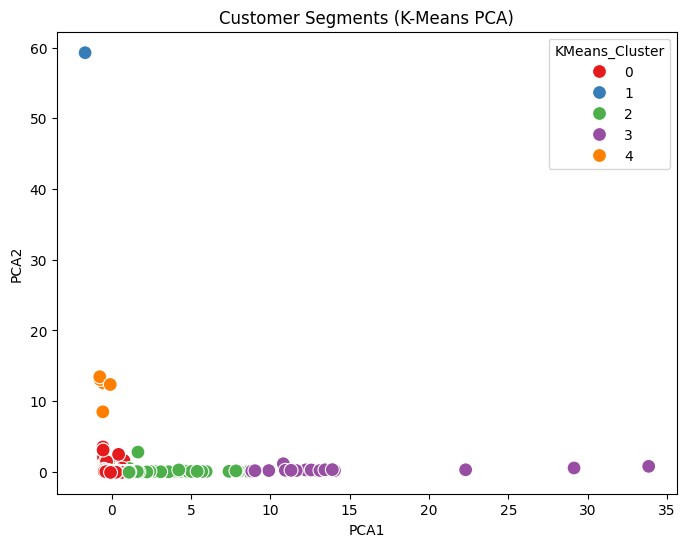

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=customer_data, palette='Set1', s=100)
plt.title('Customer Segments (K-Means PCA)')
plt.show()


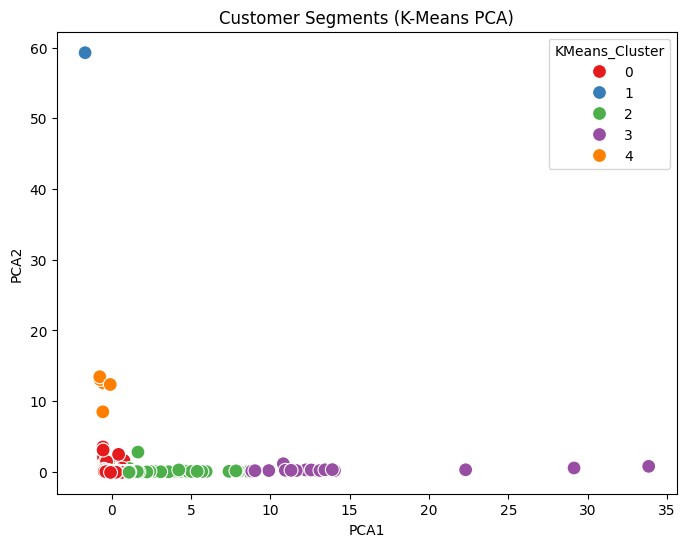

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=customer_data, palette='Set1', s=100)
plt.title('Customer Segments (K-Means PCA)')
plt.savefig('CustomerSeg_KMeans_PCA.png')
plt.show()


In [22]:
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", 'B', 16)
pdf.cell(0, 10, "Customer Segmentation Report", ln=True, align="C")

pdf.set_font("Arial", '', 12)
pdf.ln(10)
pdf.multi_cell(0, 8, "Objective:\nSegment customers based on purchasing behavior and demographics.\n\nMethodology:\n- Data cleaning\n- Feature aggregation\n- Scaling\n- Clustering (KMeans, Hierarchical, DBSCAN)\n- Dimensionality reduction (PCA)\n- Cluster profiling and business insights.")

pdf.ln(5)
pdf.multi_cell(0, 8, "Key Findings:\n- Cluster 0: High-value, frequent buyers => premium offers\n- Cluster 1: Low-value, at-risk => retention campaigns\n- Cluster 2: Moderate => upselling opportunities")

# Add PCA plot
pdf.image("CustomerSeg_KMeans_PCA.png", x=10, y=None, w=180)

pdf.output("CustomerSeg_Report.pdf")
print("PDF report generated successfully!")


PDF report generated successfully!


In [23]:
import os
os.listdir()  # should show 'CustomerSeg_Report.pdf'


['.config',
 'Customer_Segmentation.ipynb',
 'CustomerSeg_Report.pdf',
 'CustomerSeg_KMeans_Model.pkl',
 'CustomerSeg_DBSCAN_Model.pkl',
 'CustomerSeg_Hierarchical_Model.pkl',
 'CustomerSeg_KMeans_PCA.png',
 'CustomerSeg_Results.csv',
 'Online Retail.xlsx',
 'sample_data']